# Name: James McGinty
## Date: 5/13/25
### Exercise: Final Project
### Purpose: Use the cleaned dataset to answer the analysis questions

Importing necessary libraries and the cleaned csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv('vgsales_cleaned.csv')

## Question 1: Which video game genres have generated the most global sales over time?

This code creates a line plot that shows each genres global sales over time. Year is on the x-axis and global sales in millions is on the y-axis.

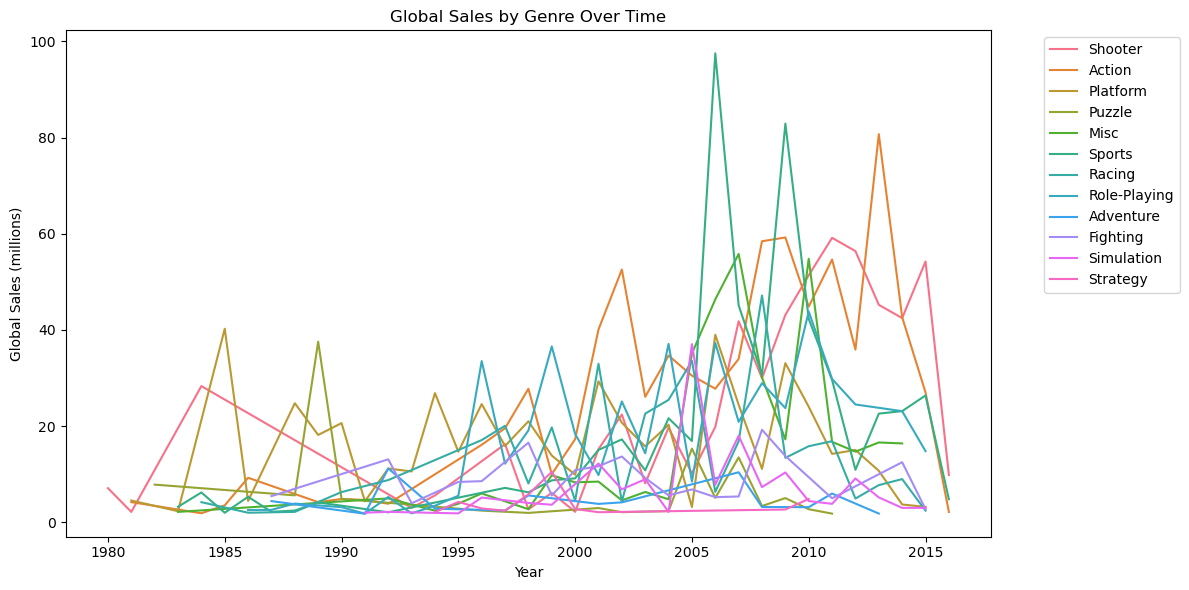

In [8]:
genre_sales = df.dropna(subset=['year', 'genre'])
genre_year_sales = genre_sales.groupby(['year', 'genre'])['global_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_year_sales, x='year', y='global_sales', hue='genre')
plt.title('Global Sales by Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Question 2: Are there clear regional preferences for certain genres or platforms?

This code creates a bar graph that shows the number of sales in each region by genre. Genre is on the x-axis and sales in millions is on the y-axis.

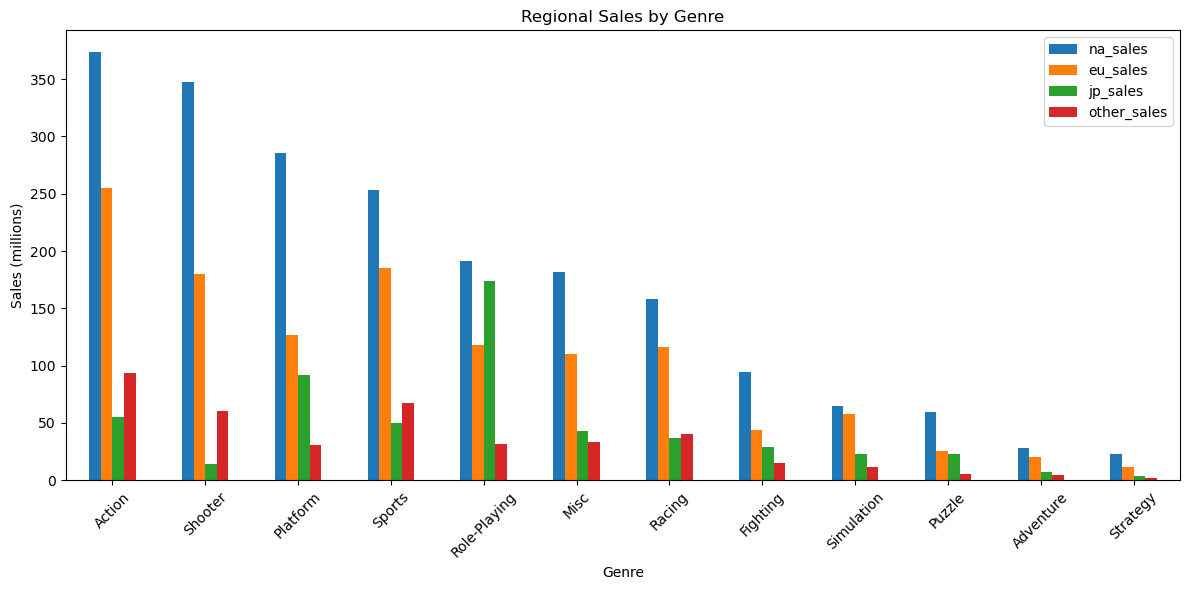

In [3]:
region_genre = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sort_values(by='na_sales', ascending=False)

region_genre.plot(kind='bar', figsize=(12, 6))
plt.title('Regional Sales by Genre')
plt.ylabel('Sales (millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This code creates a bar plot that shows the number of sales in each region by the top 10 platforms. Platform is on the x-axis and sales in millions is on the y-axis.

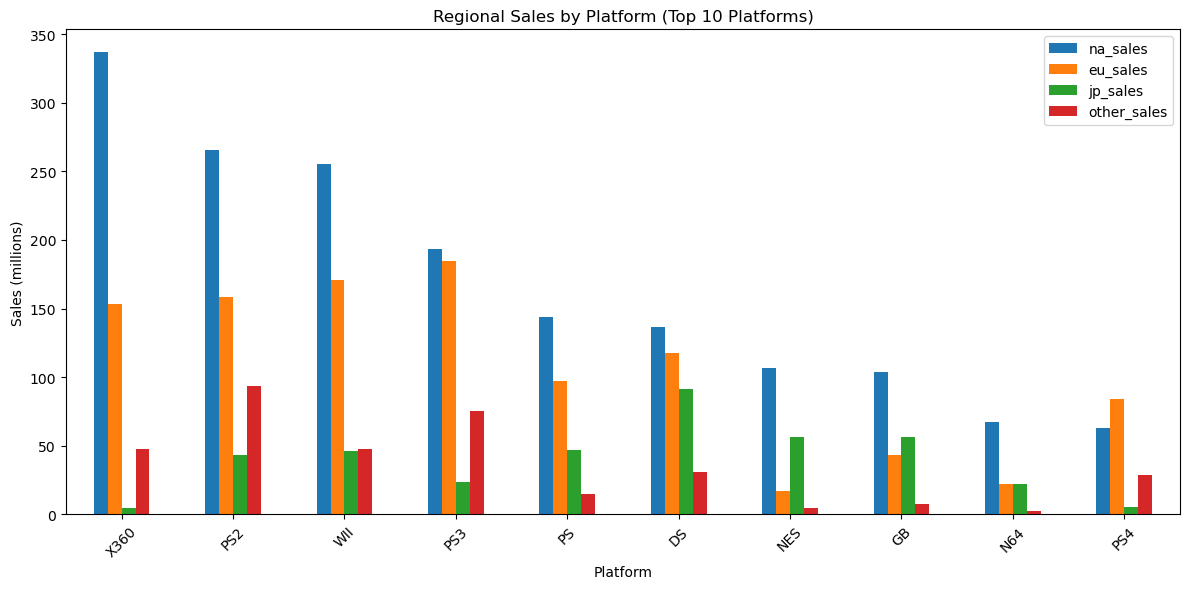

In [10]:
region_platform = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().sort_values(by='na_sales', ascending=False).head(10)

region_platform.plot(kind='bar', figsize=(12, 6))
plt.title('Regional Sales by Platform (Top 10 Platforms)')
plt.ylabel('Sales (millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 3: Which publishers consistently release high-performing games?

This code creates a bar plot that shows the top 10 publishers with the most total global sales. Publishers is on the x-axis and global sales in millions is on the y-axis.

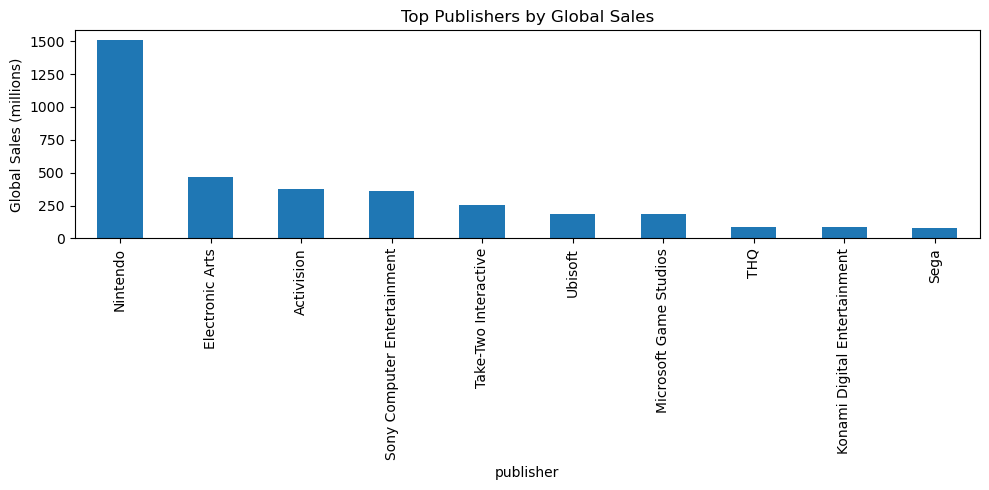

In [5]:
publisher_sales = df.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', figsize=(10, 5), title='Top Publishers by Global Sales')
plt.ylabel('Global Sales (millions)')
plt.tight_layout()
plt.show()

This code creates a bar plot that shows the top 10 publishers with the highest average global sales. Publishers is on the x-axis and average global sales in millions is on the y-axis.

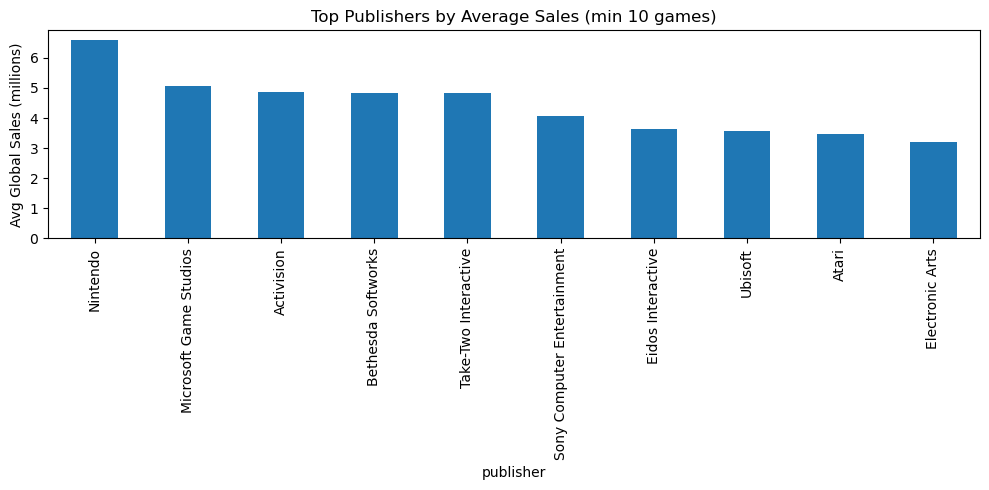

In [6]:
publisher_avg_sales = df.groupby('publisher').filter(lambda x: len(x) >= 10)
publisher_avg = publisher_avg_sales.groupby('publisher')['global_sales'].mean().sort_values(ascending=False).head(10)
publisher_avg.plot(kind='bar', figsize=(10, 5), title='Top Publishers by Average Sales (min 10 games)')
plt.ylabel('Avg Global Sales (millions)')
plt.tight_layout()
plt.show()

## Question 4: Which platforms have the most top-selling titles?

This code creates a bar plot that shows the top 10 platforms with the most games that have at least 5 million global sales. Platform is on the x-axis and number of games is on the y-axis

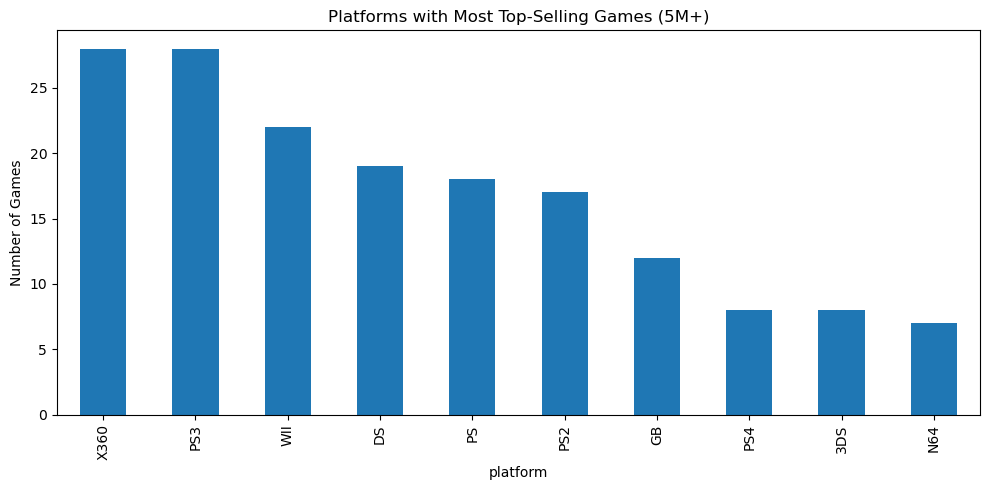

In [16]:
top_sellers = df[df['global_sales'] >= 5.0]
platform_top_counts = top_sellers['platform'].value_counts().head(10)
platform_top_counts.plot(kind='bar', figsize=(10, 5), title='Platforms with Most Top-Selling Games (5M+)')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

## Question 5: Do older games have better sales performance than newer releases?

This code creates a line plot that shows the average global sales for games over the years. Year is on the x-axis and average global sales in millions is on the y-axis

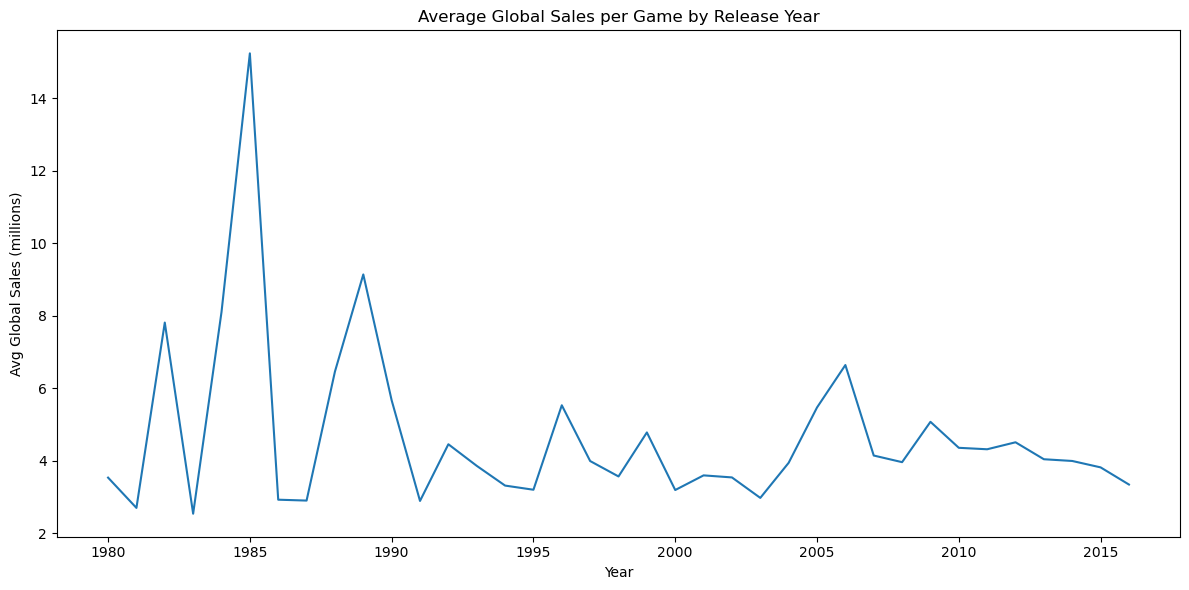

In [8]:
df_year = df.dropna(subset=['year'])
year_avg_sales = df_year.groupby('year')['global_sales'].mean()

year_avg_sales.plot(figsize=(12, 6), title='Average Global Sales per Game by Release Year')
plt.ylabel('Avg Global Sales (millions)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

## Summary of Insights

- Action and Sports games consistently generate high sales.
- North America favors shooters and sports games, while Japan prefers RPGs.
- Nintendo and Electronic Arts are consistent top performers.
- The Xbox 360 and PS3 have the most top-selling titles.
- Older games (1980-1990) had higher average sales compared to recent years.

These findings can help developers and publishers make informed decisions about which genres and platforms to prioritize and how to market by region.